In [1]:
# Import needed libraries
import pandas as pd
import numpy as np
from scipy.linalg import lstsq

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

In [2]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.expand_frame_repr', False)
# Disable scientific notation in display for ease of reading
pd.set_option('display.float_format', '{:.0f}'.format)

In [3]:
title_df = pd.read_csv("data/title.basics.tsv", sep='\t')
ratings_df = pd.read_csv("data/title.ratings.tsv", sep='\t')
title_cleaned = title_df.drop('endYear', axis=1) # dropppping end year, only relevant to tv shows
title_cleaned = title_cleaned.drop('titleType', axis=1) # drop title of type
title_cleaned = title_cleaned.drop('originalTitle', axis=1) # drop og title
title_cleaned = title_cleaned.drop('primaryTitle', axis=1) # drop primary used title



In [4]:
title_cleaned = title_df.drop('endYear', axis=1) # dropppping end year, only relevant to tv shows
title_cleaned = title_cleaned.drop('titleType', axis=1) # drop title of type
title_cleaned = title_cleaned.drop('originalTitle', axis=1) # drop og title
title_cleaned = title_cleaned.drop('primaryTitle', axis=1) # drop primary used title

In [5]:
title_cleaned['genres'] = title_cleaned['genres'].replace("\\N", "")
genre_dummies = title_cleaned['genres'].str.get_dummies(sep=",")
title_cleaned = pd.concat([title_cleaned, genre_dummies], axis=1)
title_cleaned = title_cleaned.drop("genres", axis=1)
merged = title_cleaned.merge(ratings_df, on="tconst", how="inner")

In [ ]:
merged = merged.replace("\\N", np.nan)

X = merged.drop(columns=["averageRating", "tconst"])
X = X.select_dtypes(include=[np.number])
y = merged["averageRating"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


rf = RandomForestRegressor(
    n_estimators=200,
    max_depth=None,
    random_state=42
)

rf.fit(X_train, y_train)
preds = rf.predict(X_test)

print("MSE:", mean_squared_error(y_test, preds))
print("R^2:", r2_score(y_test, preds))


In [ ]:
crew_df = pd.read_csv("data/title.crew.tsv", sep='\t')
print(crew_df.columns)
print(crew_df)
print(mean_absolute_error(y_test, preds))

importances = rf.feature_importances_
features = X.columns

indices = np.argsort(importances)

plt.figure(figsize=(8,6))
plt.barh(features[indices], importances[indices])
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importance")
plt.show()

In [ ]:
merged = merged.replace("\\N", np.nan)
X = merged.drop(columns=["averageRating", "tconst"])
X = X.drop(columns=["numVotes"])
X = X.select_dtypes(include=[np.number])
y = merged["averageRating"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
rf = RandomForestRegressor(
    n_estimators=200,
    max_depth=None,
    random_state=42
)
rf.fit(X_train, y_train)
preds = rf.predict(X_test)

Index(['isAdult', 'Action', 'Adult', 'Adventure', 'Animation', 'Biography',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy',
       'Film-Noir', 'Game-Show', 'History', 'Horror', 'Music', 'Musical',
       'Mystery', 'News', 'Reality-TV', 'Romance', 'Sci-Fi', 'Short', 'Sport',
       'Talk-Show', 'Thriller', 'War', 'Western'],
      dtype='object')


MSE: 1.797793667349299
R^2: 0.09078898531063795
1.0155838411491347


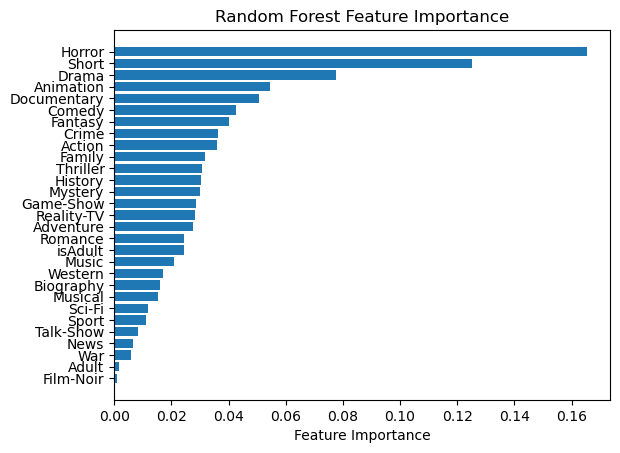

In [ ]:
print("MSE:", mean_squared_error(y_test, preds))
print("R^2:", r2_score(y_test, preds))
print(mean_absolute_error(y_test, preds))
importances = rf.feature_importances_
features = X.columns

indices = np.argsort(importances)

plt.barh(features[indices], importances[indices])
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importance")
plt.show()

In [ ]:
# For genres, make a seperate column for each individual one